In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\vinna\Downloads\gemstone.csv") 
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [3]:

print(df.shape)
print(df.dtypes)

df.isna().sum()

df.duplicated().sum()


(193573, 11)
id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


np.int64(0)

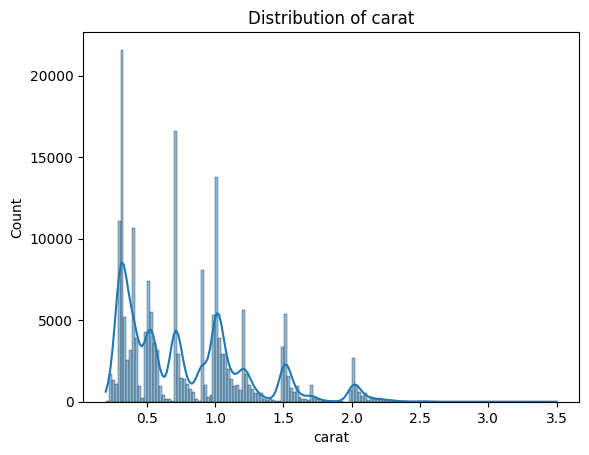

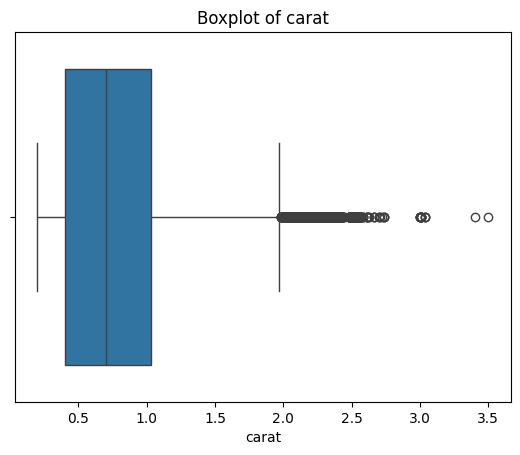

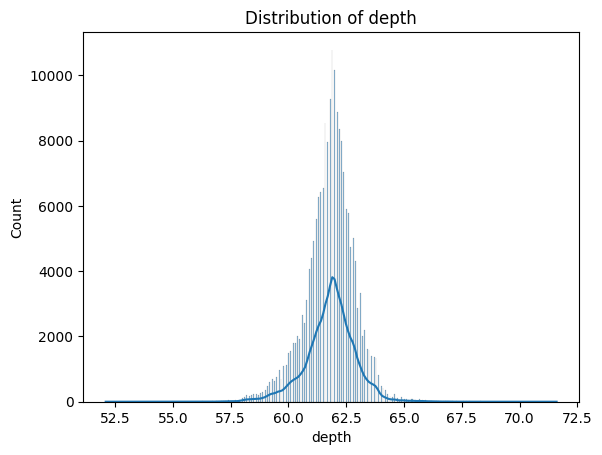

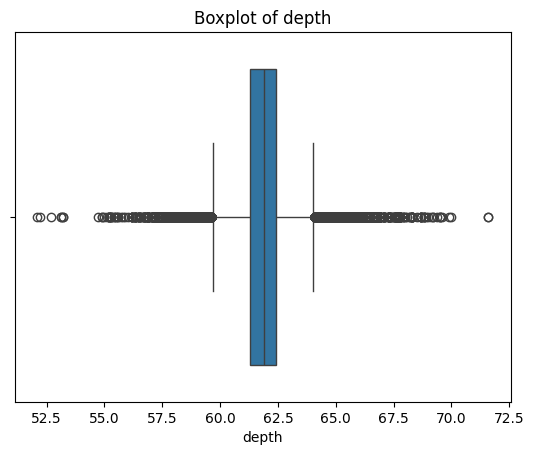

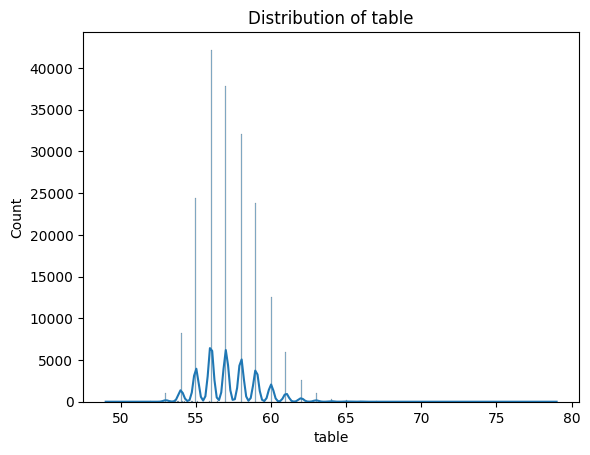

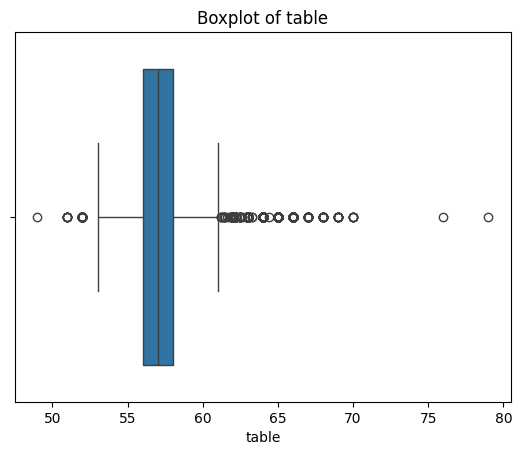

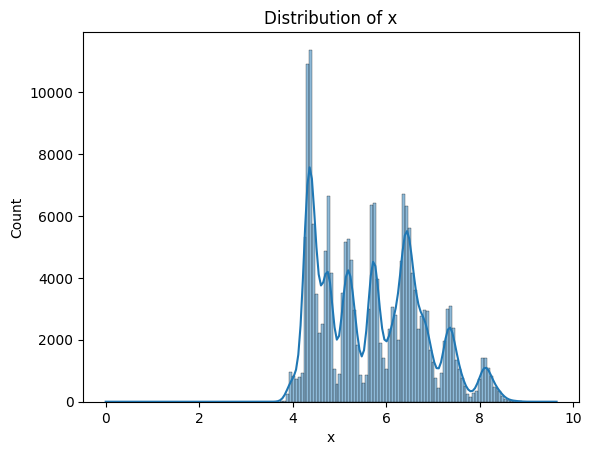

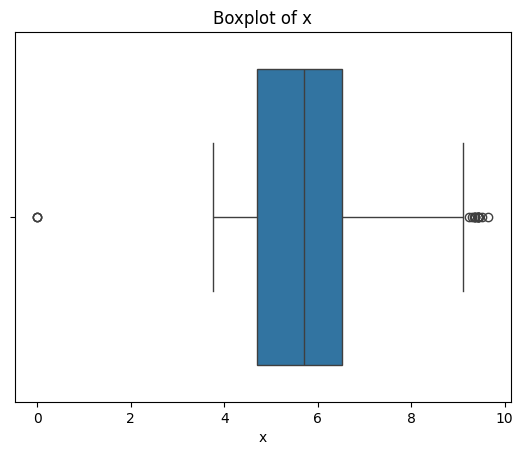

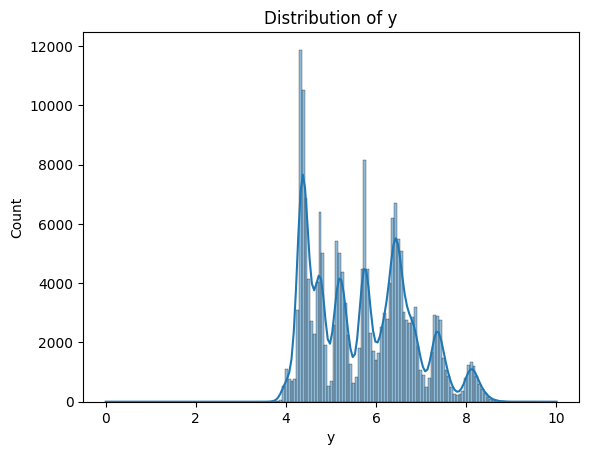

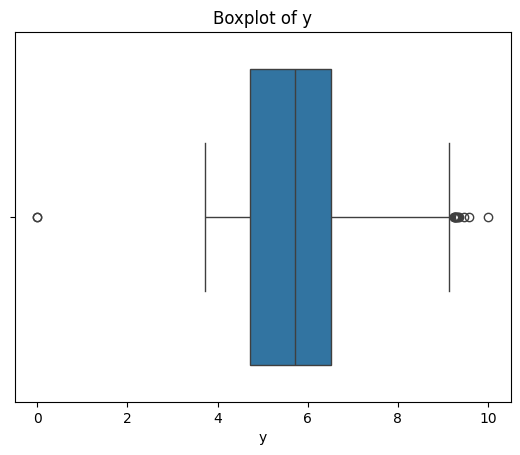

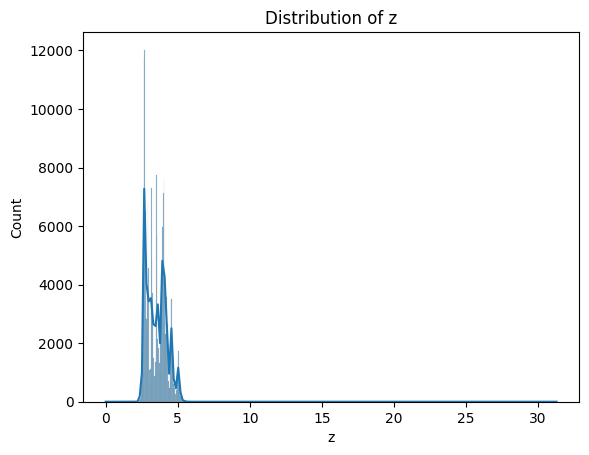

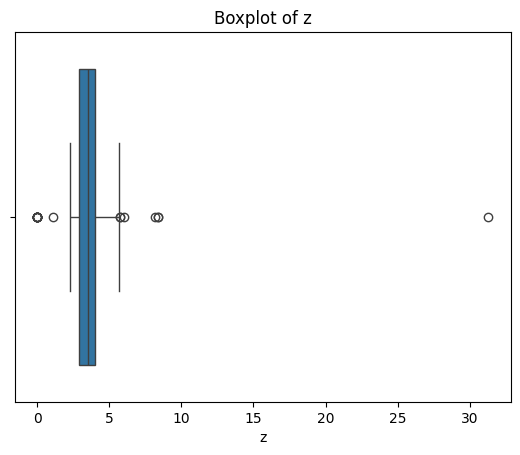

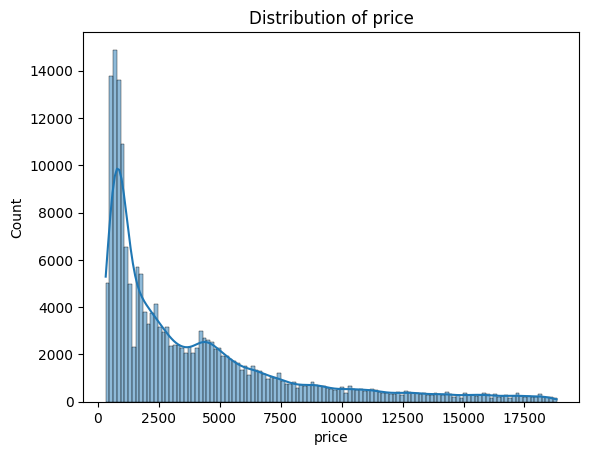

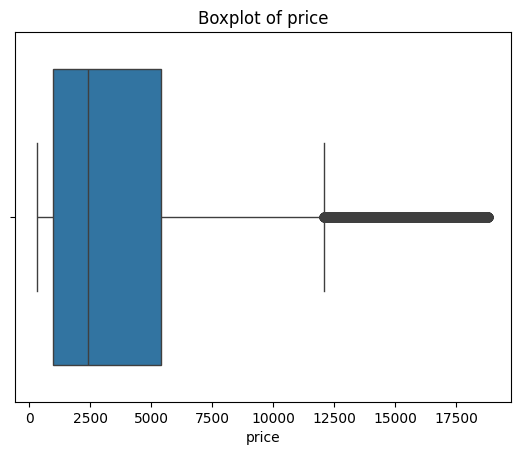

In [4]:
num_cols = ['carat','depth','table','x','y','z','price']

df[num_cols].describe()

import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64


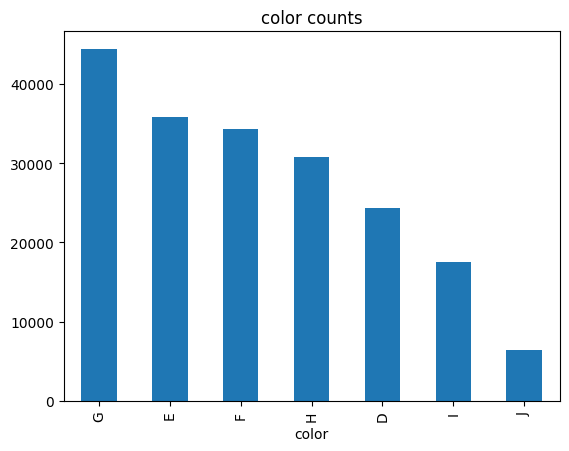

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64


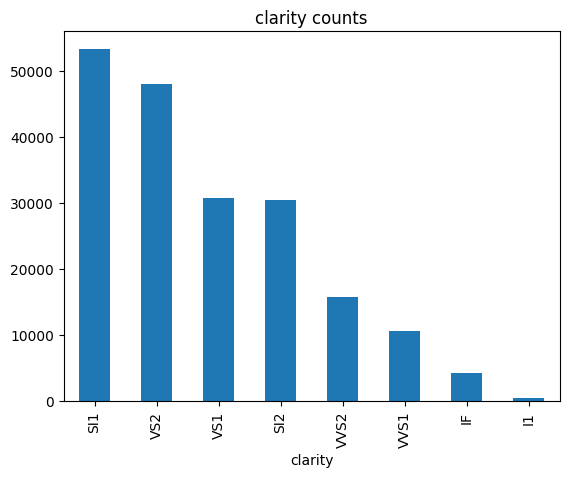

In [5]:
cat_cols = ['color','clarity']

for col in cat_cols:
    print(df[col].value_counts())
    df[col].value_counts().plot(kind='bar', title=f'{col} counts')
    plt.show()


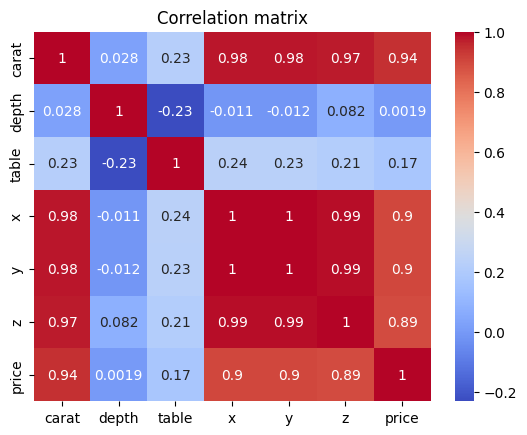

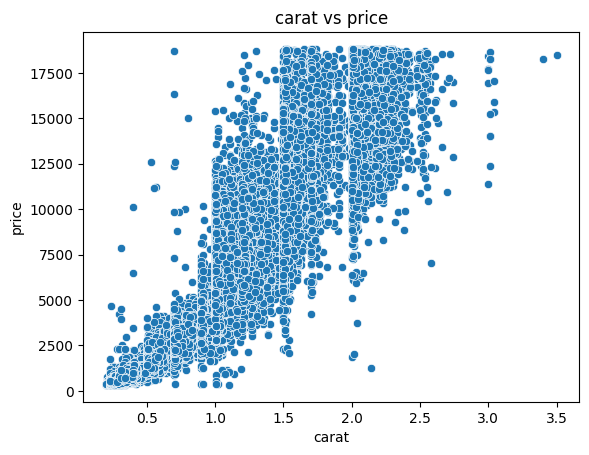

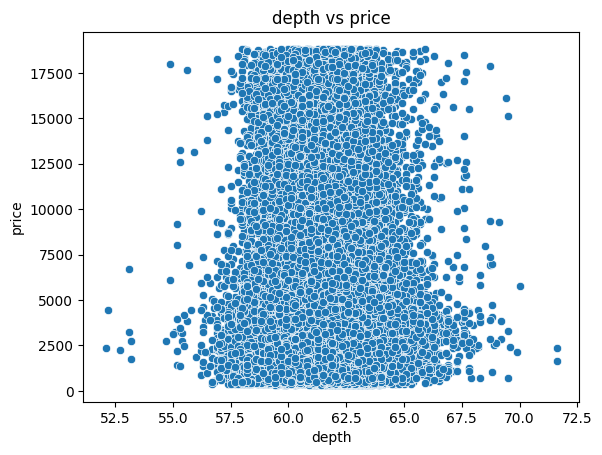

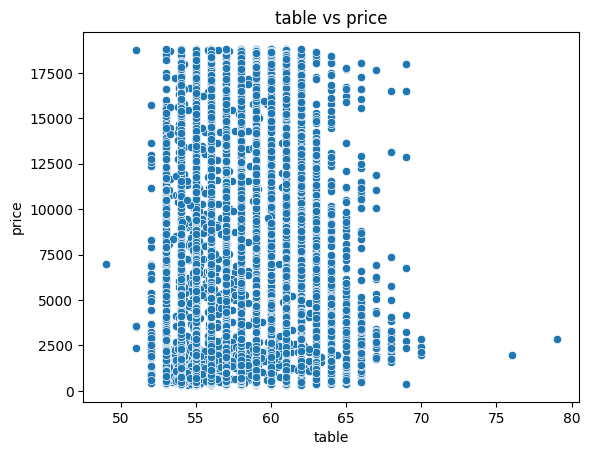

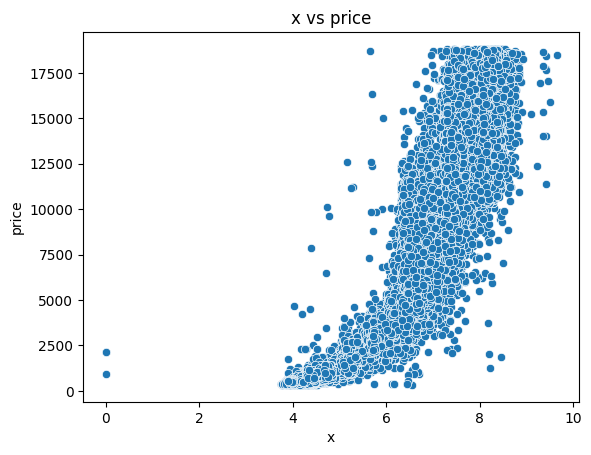

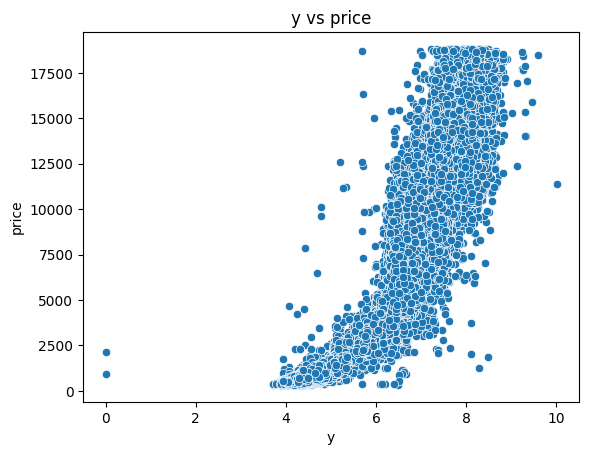

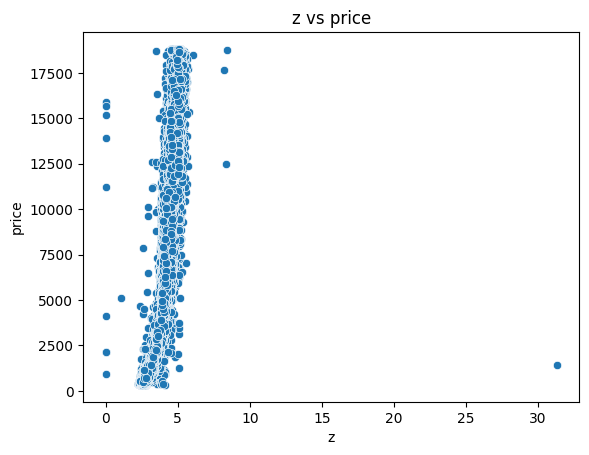

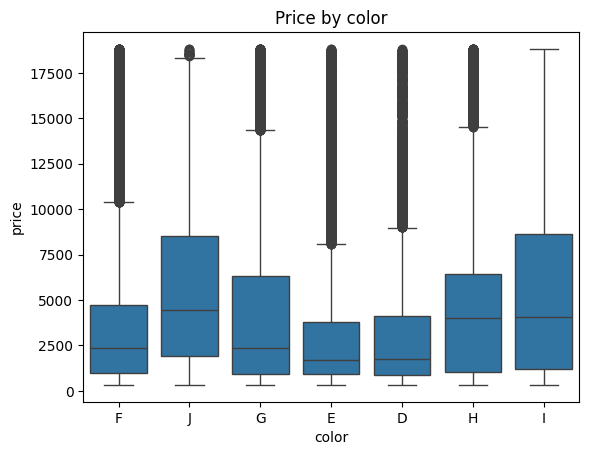

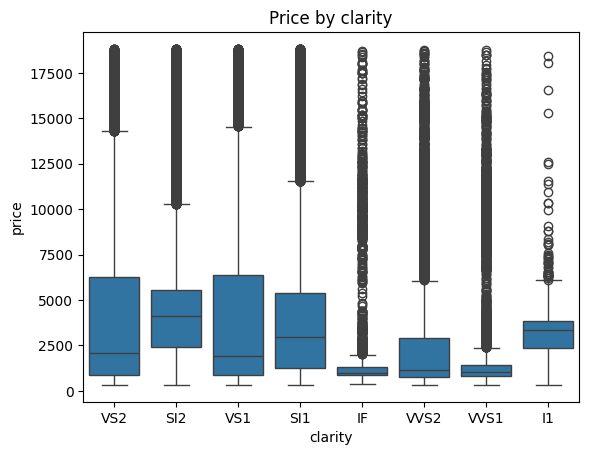

In [6]:

corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

for col in ['carat','depth','table','x','y','z']:
    plt.figure()
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f'{col} vs price')
    plt.show()

sns.boxplot(x='color', y='price', data=df)
plt.title('Price by color')
plt.show()

sns.boxplot(x='clarity', y='price', data=df)
plt.title('Price by clarity')
plt.show()


In [7]:

for col in ['carat','depth','table','x','y','z','price']:
    print(col, df[col].min(), df[col].max())


df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]


df_clean = df.dropna()  # simplest


carat 0.2 3.5
depth 52.1 71.6
table 49.0 79.0
x 0.0 9.65
y 0.0 10.01
z 0.0 31.3
price 326 18818


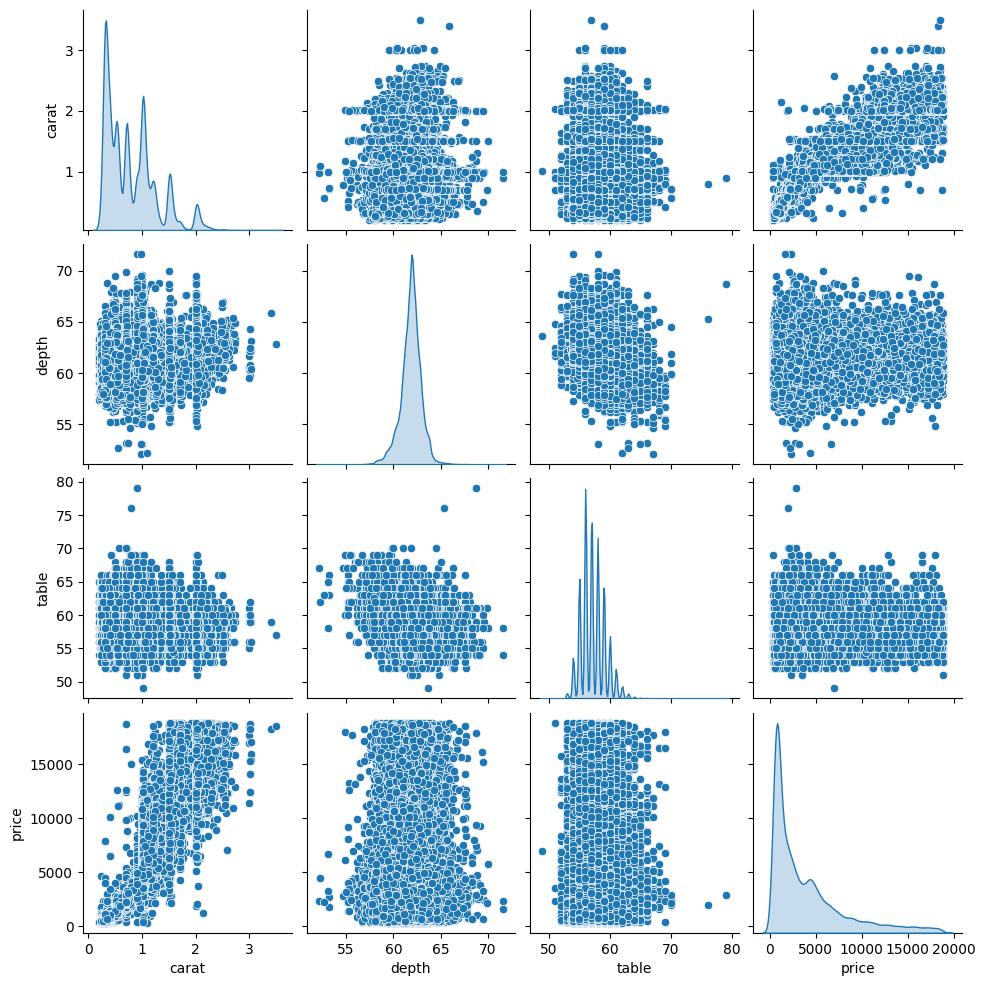

In [8]:
sns.pairplot(df[['carat','depth','table','price']], diag_kind='kde')
plt.show()
